# Naive Bayes


En este notebook se van a estar trabajando los modelos basados en Naive Bayes. Estos modelos son relativamente sencillos. ....

## Configuraciones iniciales

                                                                                                                                                        Cargamos las bibliotecas correspondientes a este modelo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import CategoricalNB

In [4]:
from preprocessing import prepararSetDeDatos
from preprocessing import categoricalNBPreprocessing
from preprocessing import multinomialNBPreprocessing
from preprocessing import gaussianNBPreprocessing

## Carga y preparacion del set de datos

Cargamos ambos set de datos, y se los pasamos a la funcion que realiza el armado hecho para el TP1.

In [5]:
y = pd.read_csv('Datasets/tp-2020-2c-train-cols1.csv')

In [6]:
X = pd.read_csv('Datasets/tp-2020-2c-train-cols2.csv')

In [7]:
X,y = prepararSetDeDatos(X,y)

## Funciones auxiliares

In [8]:
def obtenerMejorAlpha(modelo,datosPreprocesados):
    mejor_valor = 0
    mejor_alpha = None
    y_array=np.array(y)
    for valor_alpha in [0.001,0.01,0.1,0.3,0.5,0.7,1,2,3,10]:
        kf = StratifiedKFold(n_splits=8)
        metricas = []
        for fold_idx, (train_index, test_index) in enumerate(kf.split(datosPreprocesados, y_array)):
            modeloNB = modelo(alpha=valor_alpha)
            modeloNB.fit(datosPreprocesados[train_index], y_array[train_index].ravel())
            predicciones = modeloNB.predict(datosPreprocesados[test_index])
            score_obtenida = roc_auc_score(y_array[test_index],predicciones)
            metricas.append(score_obtenida)

        if np.mean(metricas) >= mejor_valor:
            mejor_valor = np.mean(metricas)
            mejor_alpha = valor_alpha
            
    return mejor_valor, mejor_alpha

In [9]:
def graficarAUCROC(tipo,modeloNB,X_test,X_train,y_test,y_train):
    
    fpr_nb_test,tpr_nb_test,thresholds_nb_test = roc_curve(y_test,modeloNB.predict_proba(X_test)[:,1])
    fpr_nb_train,tpr_nb_train,thresholds_nb_train = roc_curve(y_train,modeloNB.predict_proba(X_train)[:,1])

    zero_test = np.argmin(np.abs(thresholds_nb_test))
    zero_train = np.argmin(np.abs(thresholds_nb_train))

    plt.plot(fpr_nb_train,tpr_nb_train,label="ROC Curve "+tipo+" NB Train")
    plt.plot(fpr_nb_test,tpr_nb_test,label="ROC Curve  "+tipo+" NB Test")
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.plot(fpr_nb_test[zero_test],tpr_nb_test[zero_test],'o',markersize=10,label="threshold zero test",fillstyle="none",c="k",mew=2)
    plt.plot(fpr_nb_train[zero_train],tpr_nb_train[zero_train],'x',markersize=10,label="threshold zero train",fillstyle="none",c="k",mew=2)

    plt.legend(loc=4)
    plt.show()

## CategoricalNB

In [10]:
X_categoricalNB = categoricalNBPreprocessing(X)

In [11]:
#mejor_valor, mejor_alpha = obtenerMejorAlpha(CategoricalNB,X_categoricalNB) # Tira el index out of bounds (index 6 is out of bounds for axis 1 with size 6)
mejor_valor = 1
mejor_alpha = 1

In [12]:
print(mejor_alpha)
print(mejor_valor)

1
1


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_categoricalNB, y, test_size=0.25, random_state=0)

In [14]:
categoricalNB = CategoricalNB(alpha=mejor_alpha)

In [15]:
categoricalNB.fit(X_train, y_train)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


CategoricalNB(alpha=1)

Realizamos ahora las predicciones correspondientes con la parte de entrenamiento y la de pruebas, una vez hecho eso, mostramos las metricas obtenidas en cada uno.

In [16]:
y_pred = categoricalNB.predict(X_train)
print(classification_report(y_train, y_pred, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.84      0.81      0.82       373
      Vuelve       0.70      0.74      0.72       227

    accuracy                           0.78       600
   macro avg       0.77      0.78      0.77       600
weighted avg       0.79      0.78      0.78       600



EXPLICACION?????

In [17]:
y_pred = categoricalNB.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.85      0.80      0.83       121
      Vuelve       0.72      0.79      0.75        80

    accuracy                           0.80       201
   macro avg       0.79      0.79      0.79       201
weighted avg       0.80      0.80      0.80       201



EXPLICACION???????

In [18]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

Text(45.72222222222221, 0.5, 'Real')

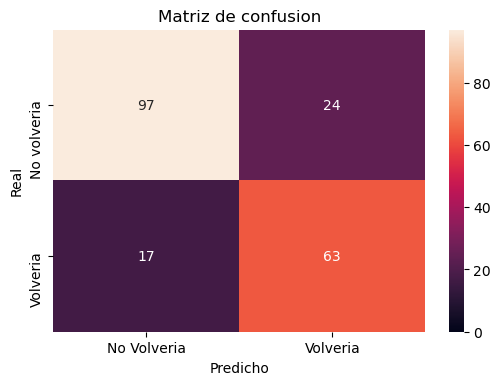

In [19]:
fig, ax = plt.subplots(dpi=100)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, vmin = 0, yticklabels=["No volveria","Volveria"], xticklabels=[ "No Volveria","Volveria"], ax=ax)
ax.set_title("Matriz de confusion")
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")

EXPLICACION???????

Graficamos ahora la curva ROC para ambos casos.

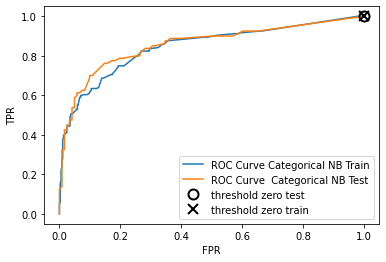

In [20]:
graficarAUCROC("Categorical",categoricalNB,X_test,X_train,y_test,y_train)

EXPLICACION??????

In [21]:
auc_cnb = roc_auc_score(y_test,categoricalNB.predict_proba(X_test)[:, 1])
print("AUC para categorical NB: {:.3f}".format(auc_cnb))

AUC para categorical NB: 0.857


PREDICIR EL OTRO ARCHIVO Y GUARDAR LOS VALROES

In [22]:
probabilidades_categorical = categoricalNB.predict_proba(X_train)
probabilidades_x_test_categorical = categoricalNB.predict_proba(X_test)

## MultinomialNB

In [23]:
X_multinomialNB = multinomialNBPreprocessing(X)

In [24]:
mejor_valor, mejor_alpha = obtenerMejorAlpha(MultinomialNB,X_multinomialNB)

Habiendo obtenido el mejor alpha para el Multinomial Naive Bayes, procedemos a desarrollarlo en mas detalle.

In [25]:
print(mejor_alpha)
print(mejor_valor)

0.1
0.7740251696543967


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_multinomialNB, y, test_size=0.25, random_state=0)

In [27]:
multinomialNB = MultinomialNB(alpha=mejor_alpha)

In [28]:
multinomialNB.fit(X_train, y_train)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MultinomialNB(alpha=0.1)

Realizamos ahora las predicciones correspondientes con la parte de entrenamiento y la de pruebas, una vez hecho eso, mostramos las metricas obtenidas en cada uno.

In [29]:
y_pred_train = multinomialNB.predict(X_train)
print(classification_report(y_train, y_pred_train, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.79      0.88      0.83       373
      Vuelve       0.76      0.61      0.67       227

    accuracy                           0.78       600
   macro avg       0.77      0.74      0.75       600
weighted avg       0.78      0.78      0.77       600



In [30]:
y_pred_test = multinomialNB.predict(X_test)
print(classification_report(y_test, y_pred_test, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.79      0.86      0.82       121
      Vuelve       0.75      0.65      0.70        80

    accuracy                           0.78       201
   macro avg       0.77      0.75      0.76       201
weighted avg       0.77      0.78      0.77       201



Como podemos observar, se obtuvieron en la mayoria de las metricas valores cercanos al 80% para ambas predicciones hechas. Vemos la matriz de confusion ahora y el area bajo la curva.

In [31]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

Text(45.72222222222221, 0.5, 'Real')

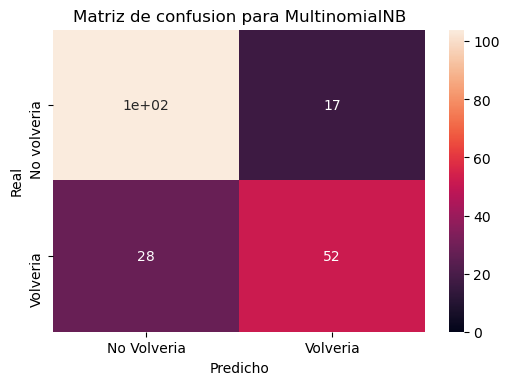

In [32]:
fig, ax = plt.subplots(dpi=100)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, vmin = 0, yticklabels=["No volveria","Volveria"], xticklabels=[ "No Volveria","Volveria"], ax=ax)
ax.set_title("Matriz de confusion para MultinomialNB")
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")

EXPLICACION???????

Graficamos ahora la curva ROC para ambos casos.

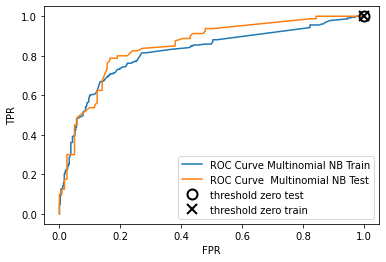

In [33]:
graficarAUCROC("Multinomial",multinomialNB,X_test,X_train,y_test,y_train)

EXPLICACION??????

In [34]:
auc_mnb = roc_auc_score(y_test,y_pred_test)
print("AUC para multinomial NB: {:.3f}".format(auc_mnb))

AUC para multinomial NB: 0.755


In [35]:
probabilidades_multinomial = multinomialNB.predict_proba(X_train)
probabilidades_x_test_multinomial = multinomialNB.predict_proba(X_test)

## GaussianNB

In [36]:
X_gaussianNB = gaussianNBPreprocessing(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_gaussianNB, y, test_size=0.25, random_state=0)

In [38]:
gaussianNB = GaussianNB()

In [39]:
gaussianNB.fit(X_train, y_train)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

Realizamos ahora las predicciones correspondientes con la parte de entrenamiento y la de pruebas, una vez hecho eso, mostramos las metricas obtenidas en cada uno.

In [40]:
y_pred_train = gaussianNB.predict(X_train)
print(classification_report(y_train, y_pred_train, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.67      0.95      0.79       373
      Vuelve       0.73      0.24      0.36       227

    accuracy                           0.68       600
   macro avg       0.70      0.59      0.57       600
weighted avg       0.69      0.68      0.62       600



In [41]:
y_pred_test = gaussianNB.predict(X_test)
print(classification_report(y_test, y_pred_test, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.65      0.92      0.76       121
      Vuelve       0.67      0.25      0.36        80

    accuracy                           0.65       201
   macro avg       0.66      0.58      0.56       201
weighted avg       0.66      0.65      0.60       201



Explicacion...


In [42]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()

Text(45.72222222222221, 0.5, 'Real')

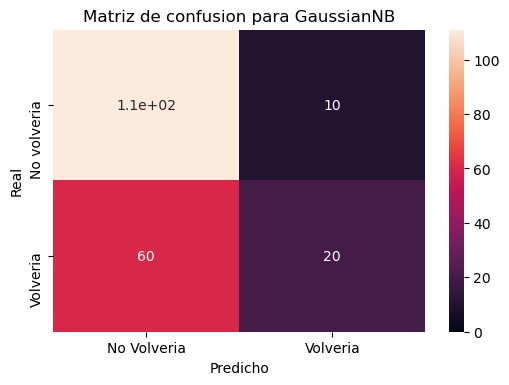

In [43]:
fig, ax = plt.subplots(dpi=100)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot = True, vmin = 0, yticklabels=["No volveria","Volveria"], xticklabels=[ "No Volveria","Volveria"], ax=ax)
ax.set_title("Matriz de confusion para GaussianNB")
ax.set_xlabel("Predicho")
ax.set_ylabel("Real")

EXPLICACION???????

Graficamos ahora la curva ROC para ambos casos.

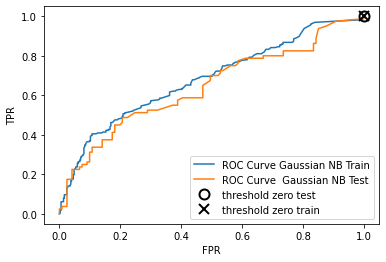

In [44]:
graficarAUCROC("Gaussian",gaussianNB,X_test,X_train,y_test,y_train)

EXPLICACION??????

In [45]:
auc_gnb = roc_auc_score(y_test,y_pred_test)
print("AUC para gaussian NB: {:.3f}".format(auc_gnb))

AUC para gaussian NB: 0.584


Observamos que se obtuvo un valor muy bajo. Esto era esperable, ya que se estan analizando muy pocas variables (edad,autoc..,precio) COMPLETAR

In [46]:
probabilidades_gaussian = gaussianNB.predict_proba(X_train)
probabilidades_x_test_gaussian = gaussianNB.predict_proba(X_test)

## Ensamble de Naive Bayes

Viendo que sklearn tiene la limitacion de que no permite trabajar a la vez con variables categoricas y variables continuas, decidimos realizar un ensamble al que le pasamos las probabilidades de los 3 modelos hechos anteriormente. De esta forma, logramos obtener un modelo de Naive Bayes que trabaje con ambos tipos de variables.

In [47]:
ensamble_gaussiano = GaussianNB()

In [48]:
probabilidades = np.hstack((probabilidades_multinomial, probabilidades_categorical , probabilidades_gaussian))
probabilidades_x_test = np.hstack((probabilidades_x_test_multinomial, probabilidades_x_test_categorical , probabilidades_x_test_gaussian))

In [49]:
ensamble_gaussiano.fit(probabilidades,y_train)

C:\Users\Bruno\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [50]:
y_pred = ensamble_gaussiano.predict(probabilidades_x_test)

In [51]:
print(classification_report(y_test, y_pred, target_names=['No vuelve','Vuelve']))

              precision    recall  f1-score   support

   No vuelve       0.84      0.79      0.81       121
      Vuelve       0.70      0.78      0.74        80

    accuracy                           0.78       201
   macro avg       0.77      0.78      0.78       201
weighted avg       0.79      0.78      0.78       201



In [52]:
auc_enb = roc_auc_score(y_test,y_pred)
print("AUC para el ensamble de NB: {:.3f}".format(auc_enb))

AUC para el ensamble de NB: 0.780


Explicaciones...

## Conclusiones Naive Bayes